In [72]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 27.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 24.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]


In [51]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 24.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
Ideas for predictions:
Determine how good the elo rating is
Determine the significance of playing black vs white
Predict how much elo a person/elo will gain or lose after each match
Find the probability of each individual player winning against certain elo


SyntaxError: invalid syntax (1011322465.py, line 1)

In [ ]:
To do:
Remove interpolation on graphs
comment everything
Make at least 1 model (preferably related to predicting how much Elo a person will win or lose)
Find a bunch of conclusions through statistics- Listed cell above
Clean up everything


Models:
XGBoost (Baseline Done)
Linear Regression (Baseline done)

In [ ]:
dataframes:
first_chunk - first 100,000 rows of original dataset

In [2]:
# chunk size
chunk_size = 100000

chunks = pd.read_csv("chess_games.csv", chunksize=chunk_size)

first_chunk = next(chunks)

first_chunk.head(10)


,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
5,Blitz tournament,lucaseixasouza,diguim,0-1,2016.06.30,22:00:02,1773,1809,-10.0,10.0,C27,Vienna Game,180+0,Normal,1. e4 e5 2. Nc3 d6 3. Nf3 h6 4. Bc4 c6 5. b3 Q...
6,Blitz tournament,RENZZO77,HeadlessChicken,0-1,2016.06.30,22:00:02,1895,1886,-12.0,12.0,B10,Caro-Kann Defense: Two Knights Attack,180+0,Time forfeit,1. e4 c6 2. Nf3 d5 3. Nc3 dxe4 4. Nxe4 Nf6 5. ...
7,Blitz tournament,ipero,Bayern123,1-0,2016.06.30,22:00:02,2155,2356,20.0,-20.0,D02,Queen's Pawn Game: London System,180+0,Normal,1. d4 d5 2. Nf3 Nf6 3. Bf4 c6 4. e3 Bg4 5. Be2...
8,Blitz tournament,Loginov19510410,Kereshu,0-1,2016.06.30,22:00:02,2010,2111,-9.0,9.0,A45,Indian Game,300+0,Normal,1. d4 Nf6 2. Bf4 e6 3. e3 d5 4. Nf3 h6 5. Bd3 ...
9,Blitz tournament,Shambobala,cernunnoss,1-0,2016.06.30,22:00:02,1764,1773,12.0,-12.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Nf6 4. Be2 c6 5. ...


In [3]:
dtype_dict = {
    'Event':'object',
    'Result':'object',
    'WhiteElo': 'int64',
    'BlackElo': 'int64',
    'WhiteRatingDiff': 'float64',
    'BlackRatingDiff': 'float64',
}

In [4]:
df = pd.read_csv("chess_games.csv", dtype=dtype_dict)

In [50]:
first_chunk.describe()

,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff
count,100000.000000,100000.000000,99954.000000,99954.000000
mean,1737.938750,1735.917760,0.623887,-0.189527
std,264.168375,265.711759,22.549863,22.435702
min,799.000000,738.000000,-537.000000,-570.000000
25%,1557.000000,1554.000000,-9.000000,-10.000000
50%,1738.000000,1735.000000,1.000000,-1.000000
75%,1914.250000,1914.000000,10.000000,9.000000
max,2737.000000,2731.000000,638.000000,644.000000


In [3]:
df=first_chunk.drop(["AN","UTCDate","UTCTime","White","Black","Opening"],axis=1)

In [52]:
first_chunk['White'].value_counts()

White
playfasterordie     110
BeautifulSquares     94
ssww94               93
companal2            91
palang1359           89
                   ... 
dissidents            1
marty108              1
ataman42              1
theproguy88           1
brkoni69              1
Name: count, Length: 24307, dtype: int64

In [9]:
# Creating a function to explore data
def explore(df):
  df.drop_duplicates
  print(f"The shape of the dataset is {df.shape}")
  df.info()
  # Histograms
  for column in df.columns:
    plt.figure()
    if df[column].dtype=='object':
      sns.countplot(x=column,data=df)
      plt.title(f"COunt plot for {column}")
    else:
      sns.histplot(df[column])
      plt.title(f"Histogram plot for {column}")

    plt.show()
  # Correlation anyalysis

  # Getting numerical columns
  numerical_features = df.select_dtypes(include=['float', 'int'])

  # Finding correlation
  correlation_matrix = numerical_features.corr()

  # Visualization
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()

The shape of the dataset is (5045004, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045004 entries, 0 to 5045003
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Event            object 
 1   White            object 
 2   Black            object 
 3   Result           object 
 4   UTCDate          object 
 5   UTCTime          object 
 6   WhiteElo         int64  
 7   BlackElo         int64  
 8   WhiteRatingDiff  float64
 9   BlackRatingDiff  float64
 10  ECO              object 
 11  Opening          object 
 12  TimeControl      object 
 13  Termination      object 
 14  AN               object 
dtypes: float64(2), int64(2), object(11)
memory usage: 577.4+ MB


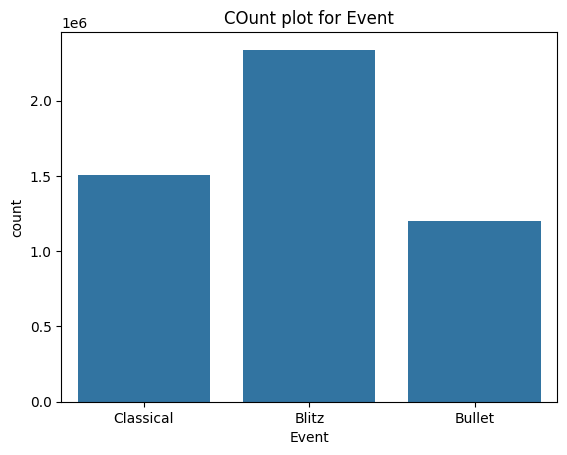

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7efcb3885ab0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
explore(df)

The shape of the dataset is (82098, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 82098 entries, 0 to 82129
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Event            82098 non-null  object 
 1   Result           82098 non-null  object 
 2   WhiteElo         82098 non-null  int64  
 3   BlackElo         82098 non-null  int64  
 4   WhiteRatingDiff  82098 non-null  float64
 5   BlackRatingDiff  82098 non-null  float64
 6   ECO              82098 non-null  object 
 7   TimeControl      82098 non-null  object 
 8   Termination      82098 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.3+ MB


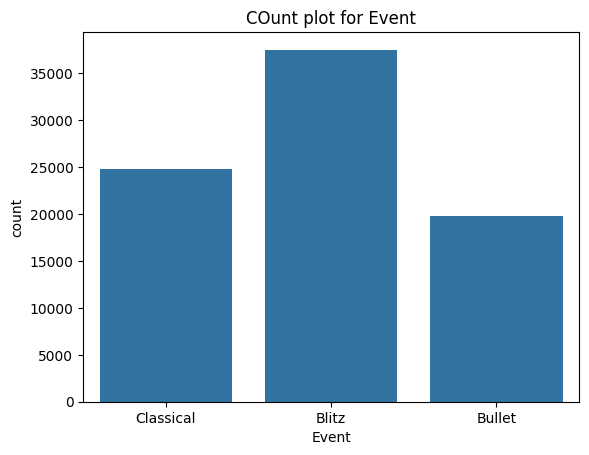

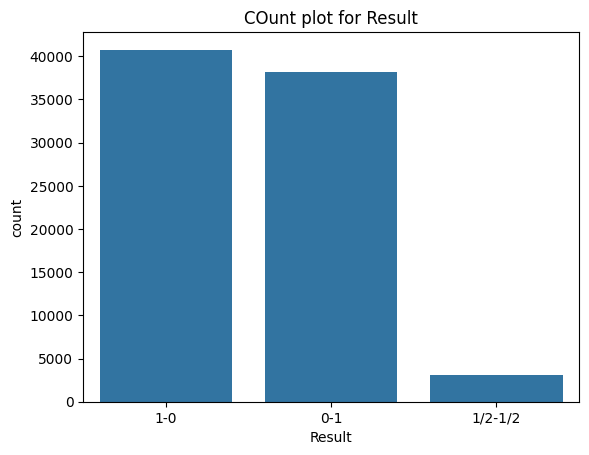

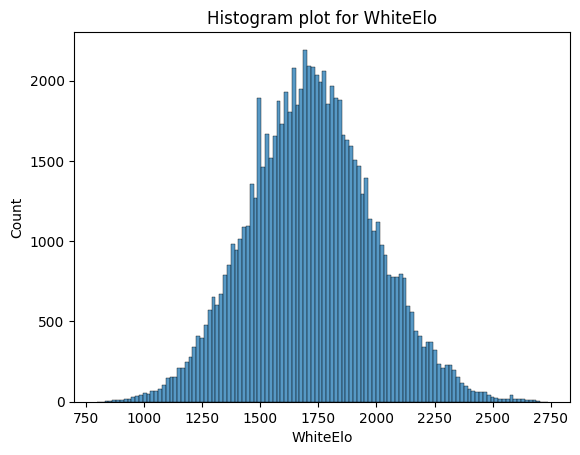

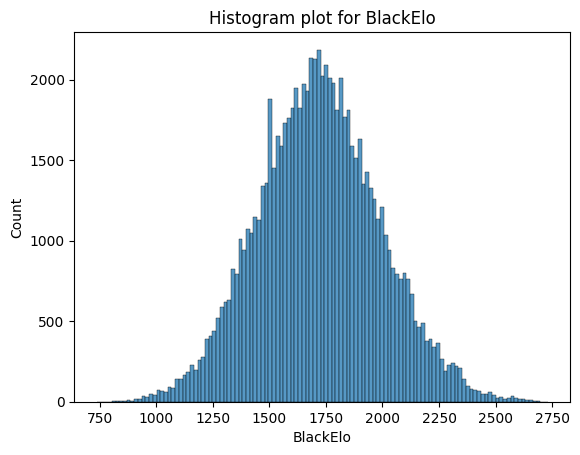

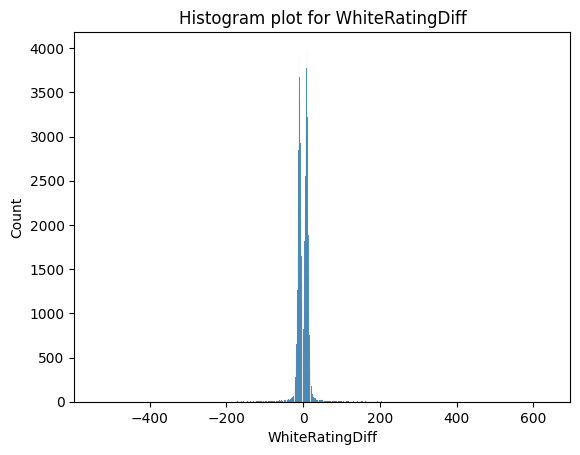

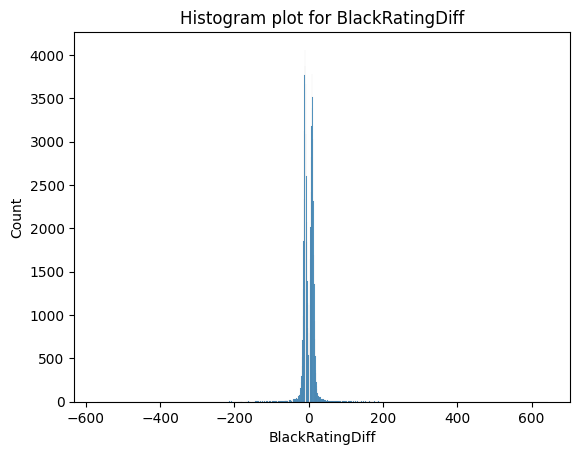

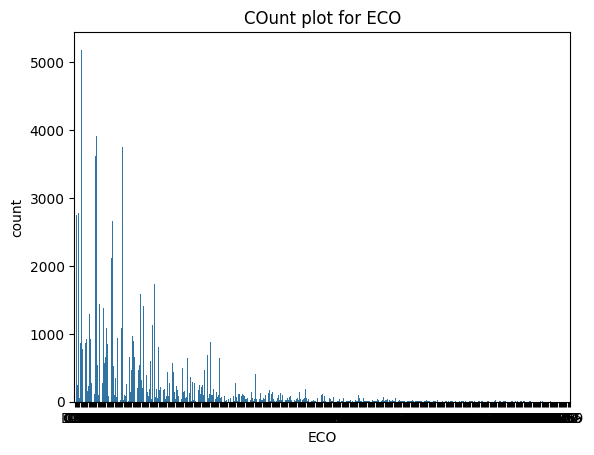

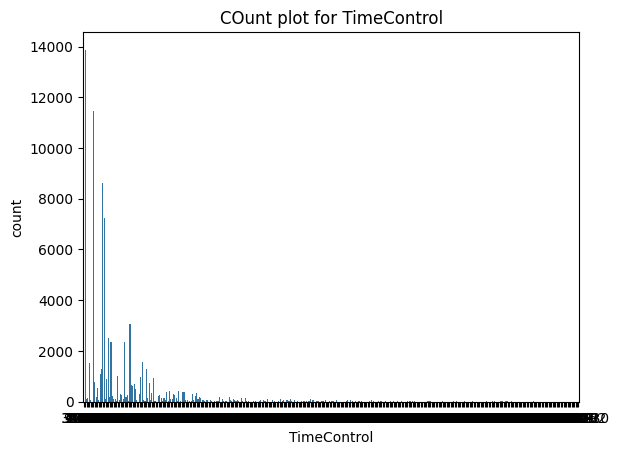

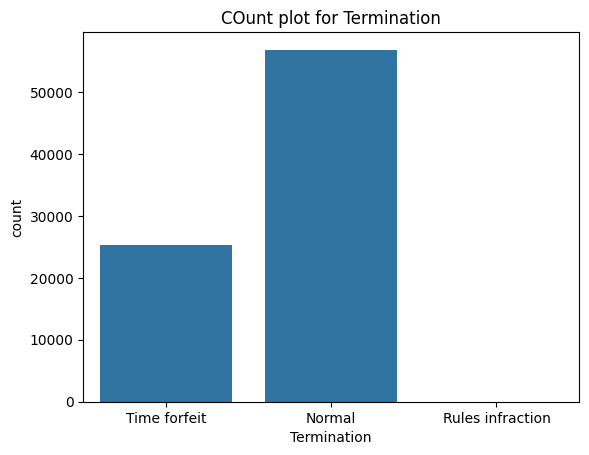

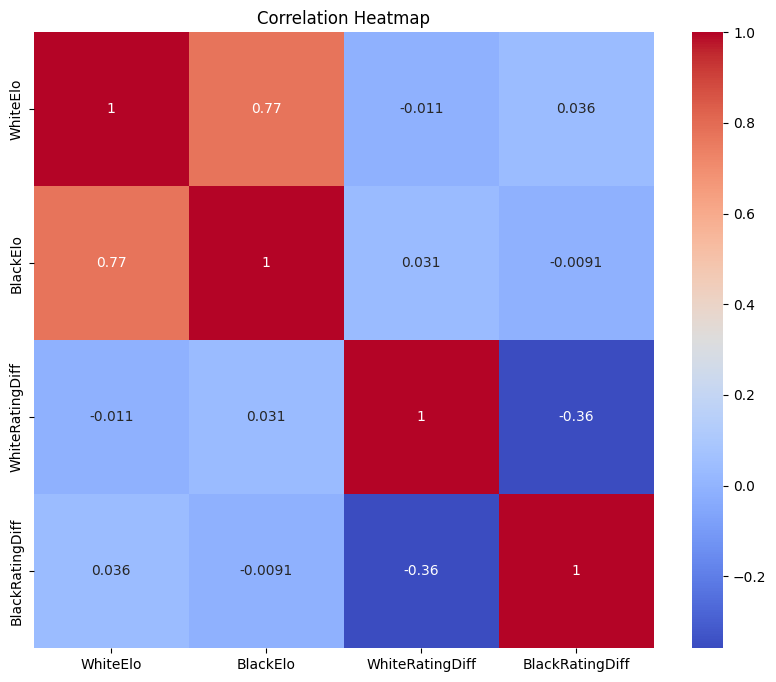

In [63]:
explore(df)

In [54]:
first_chunk['Event'].value_counts()

Event
 Blitz                    37532
 Classical                24832
 Bullet                   19766
 Bullet tournament         7379
 Blitz tournament          7342
 Classical tournament      2752
 Correspondence             396
Blitz tournament              1
Name: count, dtype: int64

In [5]:
df.shape

(6256184, 15)

In [8]:
# Normalize text
df["Event"] = df["Event"].str.strip()

# Only keep exact matches
valid_events = ["Blitz", "Bullet", "Classical"]
df = df[df["Event"].isin(valid_events)]

# Optional: reset index
df.reset_index(drop=True, inplace=True)


In [13]:
df['Event'].value_counts()

Event
Blitz        2338366
Classical    1508985
Bullet       1197653
Name: count, dtype: int64

In [ ]:
df=df.drop(["AN","UTCDate","UTCTime","White","Black","Opening"],axis=1)

In [14]:
df.head()

,Event,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination
0,Classical,1-0,1901,1896,11.0,-11.0,D10,300+5,Time forfeit
1,Blitz,0-1,1641,1627,-11.0,12.0,C20,300+0,Normal
2,Classical,0-1,1649,1638,-13.0,11.0,C57,900+3,Normal
3,Classical,1-0,1630,1500,7.0,-7.0,C41,420+5,Normal
4,Classical,1-0,1635,1572,9.0,-10.0,C54,300+8,Normal


In [7]:
df=df.dropna()

In [7]:
df.shape

(6238103, 9)

In [8]:
df['Termination'].value_counts()

Termination
Normal          4227924
Time forfeit    2010179
Name: count, dtype: int64

In [6]:
df=df[~df['Termination'].isin(['Rules infraction','Abandoned'])]

In [25]:
#One hot encoding
df_encoded=pd.get_dummies(df_d,dtype=int)

In [5]:
#Creating a dataframe without ECO and Time Control, there are too many different categories for one hot encoding
df_d=df.drop(["ECO","TimeControl"], axis=1)

In [26]:
df_encoded.head()

,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Event_Blitz,Event_Bullet,Event_Classical,Result_0-1,Result_1-0,Result_1/2-1/2,Termination_Normal,Termination_Time forfeit
0,1901,1896,11.0,-11.0,0,0,1,0,1,0,0,1
1,1641,1627,-11.0,12.0,1,0,0,1,0,0,1,0
2,1649,1638,-13.0,11.0,0,0,1,1,0,0,1,0
3,1630,1500,7.0,-7.0,0,0,1,0,1,0,1,0
4,1635,1572,9.0,-10.0,0,0,1,0,1,0,1,0


In [27]:
# I'm spoiled and want specific column names
# I'm sure there is a way to automate this, but right now I'm going to do it manually.
df_correct_col=df_encoded.rename(columns={"Event_Blitz":"Blitz","Event_Bullet":"Bullet","Event_Classical":"Classical",
                                          "Result_0-1":"Black_Win","Result_1-0":"White_Win","Result_1/2-1/2":"Draw",
                                          "Termination_Normal":"Checkmate","Termination_Rules infraction":"Rule_Infraction",
                                          "Termination_Time forfeit":"Time_Forfeit"})

In [28]:
# I swear this was just working but im on a bit of a time crunch, so fix it later (fixed*)
df_correct_col.head()

,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Blitz,Bullet,Classical,Black_Win,White_Win,Draw,Checkmate,Time_Forfeit
0,1901,1896,11.0,-11.0,0,0,1,0,1,0,0,1
1,1641,1627,-11.0,12.0,1,0,0,1,0,0,1,0
2,1649,1638,-13.0,11.0,0,0,1,1,0,0,1,0
3,1630,1500,7.0,-7.0,0,0,1,0,1,0,1,0
4,1635,1572,9.0,-10.0,0,0,1,0,1,0,1,0


In [29]:
#Normalizing first 4 columns
normalize_cols=['WhiteElo','BlackElo','WhiteRatingDiff','BlackRatingDiff']

scalar = StandardScaler()
df_norm = df_correct_col.copy()
df_norm[normalize_cols] = scalar.fit_transform(df_correct_col[normalize_cols])

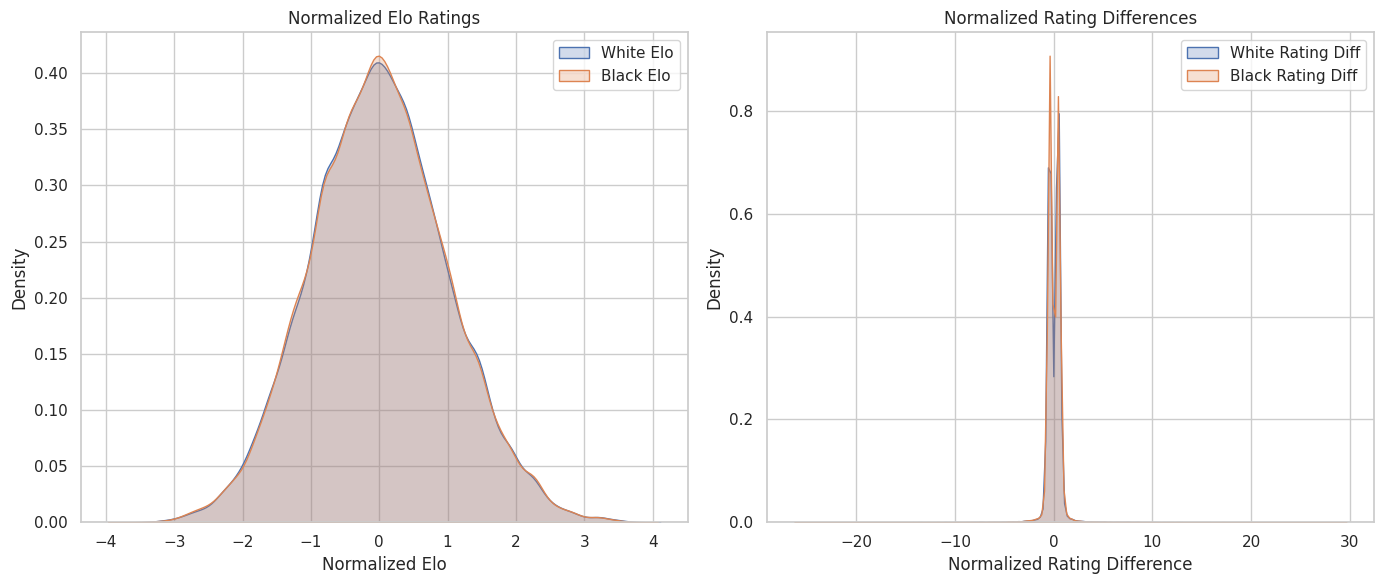

In [69]:
#Sns to show normalized features black vs white
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# --- Plot 1: White vs Black Elo ---
sns.kdeplot(df_norm['WhiteElo'], label='White Elo', fill=True, ax=axes[0])
sns.kdeplot(df_norm['BlackElo'], label='Black Elo', fill=True, ax=axes[0])
axes[0].set_title('Normalized Elo Ratings')
axes[0].set_xlabel('Normalized Elo')
axes[0].set_ylabel('Density')
axes[0].legend()

# --- Plot 2: White vs Black Rating Diff ---
sns.kdeplot(df_norm['WhiteRatingDiff'], label='White Rating Diff', fill=True, ax=axes[1])
sns.kdeplot(df_norm['BlackRatingDiff'], label='Black Rating Diff', fill=True, ax=axes[1])
axes[1].set_title('Normalized Rating Differences')
axes[1].set_xlabel('Normalized Rating Difference')
axes[1].set_ylabel('Density')
axes[1].legend()

# Layout adjustment
plt.tight_layout()
plt.show()


In [70]:
df_norm.head()

,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Blitz,Bullet,Classical,Black_Win,White_Win,Draw,Checkmate,Rule_Infraction,Time_Forfeit
0,0.670480,0.654694,0.478649,-0.491636,0,0,1,0,1,0,0,0,1
1,-0.302634,-0.346406,-0.527983,0.556423,1,0,0,1,0,0,1,0,0
2,-0.272692,-0.305469,-0.619495,0.510855,0,0,1,1,0,0,1,0,0
3,-0.343804,-0.819045,0.295625,-0.309365,0,0,1,0,1,0,1,0,0
4,-0.325090,-0.551092,0.387137,-0.446069,0,0,1,0,1,0,1,0,0


In [ ]:
The 3 following sets of graphs were created prior to normalization

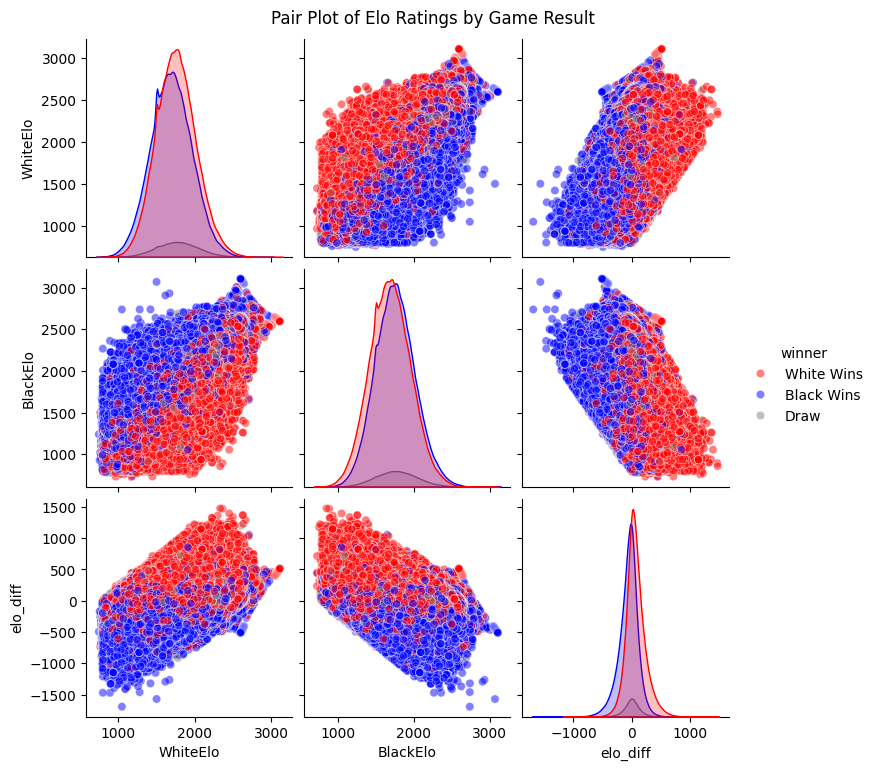

In [20]:
# Create a new column to label the winner
def determine_winner(result):
    if result == '1-0':
        return 'White Wins'
    elif result == '0-1':
        return 'Black Wins'
    elif result == '1/2-1/2':
        return 'Draw'
    else:
        return 'Unknown'

df['winner'] = df['Result'].apply(determine_winner)

# Create elo difference column
df['elo_diff'] = df['WhiteElo'] - df['BlackElo']

# Select features to compare
features = ['WhiteElo', 'BlackElo', 'elo_diff']

# Create pair plot
sns.pairplot(df, vars=features, hue='winner', palette={'White Wins': 'red', 'Black Wins': 'blue', 'Draw': 'gray'}, plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Elo Ratings by Game Result", y=1.02)
plt.show()


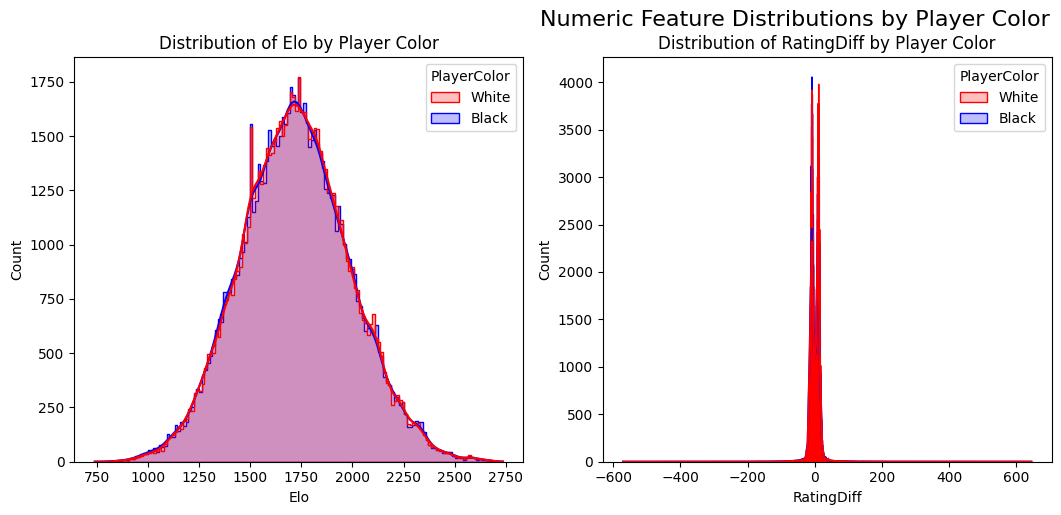

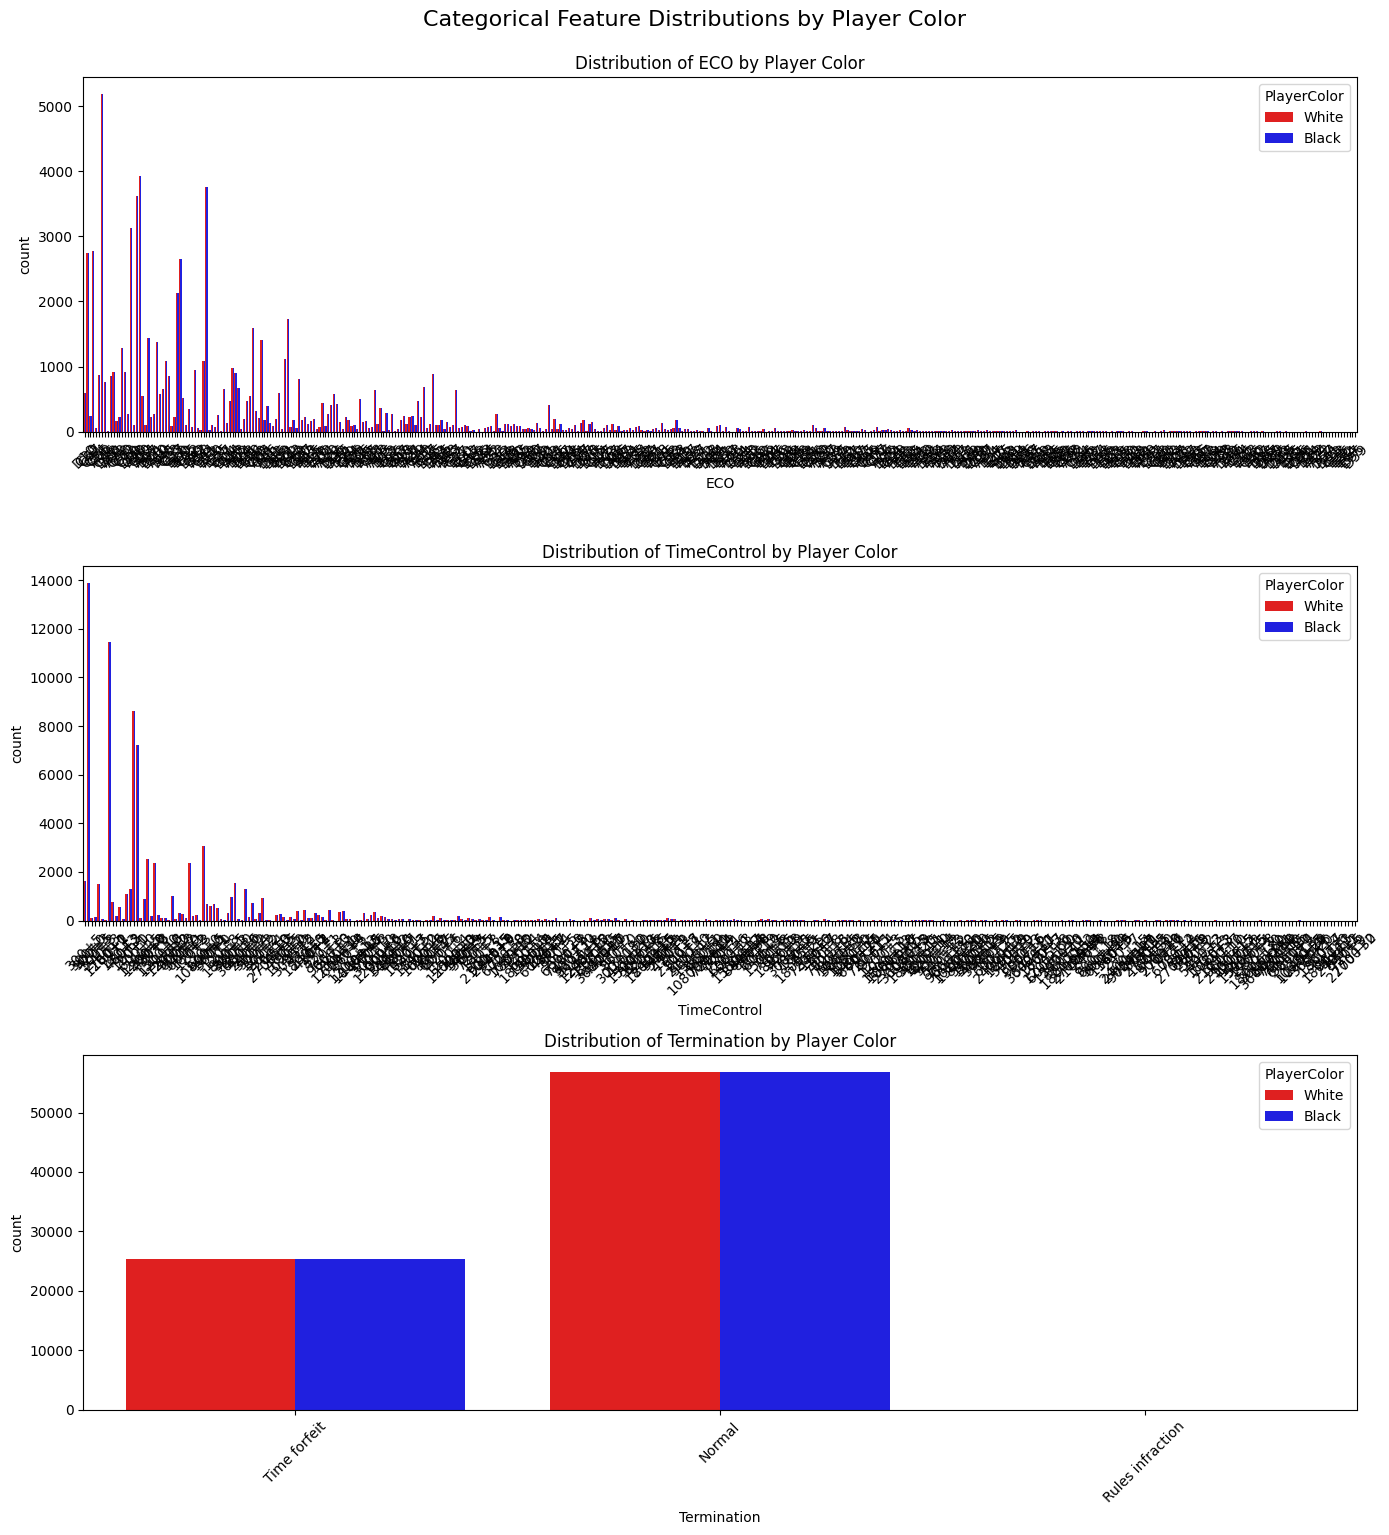

In [10]:


# Prepare the White and Black player data
white_df = df[['WhiteElo', 'WhiteRatingDiff', 'ECO', 'TimeControl', 'Termination']].copy()
white_df.columns = ['Elo', 'RatingDiff', 'ECO', 'TimeControl', 'Termination']
white_df['PlayerColor'] = 'White'

black_df = df[['BlackElo', 'BlackRatingDiff', 'ECO', 'TimeControl', 'Termination']].copy()
black_df.columns = ['Elo', 'RatingDiff', 'ECO', 'TimeControl', 'Termination']
black_df['PlayerColor'] = 'Black'

# Combine into one long DataFrame
combined_df = pd.concat([white_df, black_df], ignore_index=True)

# Select features
numeric_cols = ['Elo', 'RatingDiff']
categorical_cols = ['ECO', 'TimeControl', 'Termination']

# ---- Plot numeric features (histograms) ----
import math

num_plots = len(numeric_cols)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=combined_df, x=col, hue='PlayerColor', kde=True, element='step', ax=axes[i],
                 palette={'White': 'red', 'Black': 'blue'}, common_norm=False)
    axes[i].set_title(f'Distribution of {col} by Player Color')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Numeric Feature Distributions by Player Color", y=1.02, fontsize=16)
plt.show()

# ---- Plot categorical features (count plots) ----
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(14, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=combined_df, x=col, hue='PlayerColor', palette={'White': 'red', 'Black': 'blue'}, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Player Color')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions by Player Color", y=1.02, fontsize=16)
plt.show()


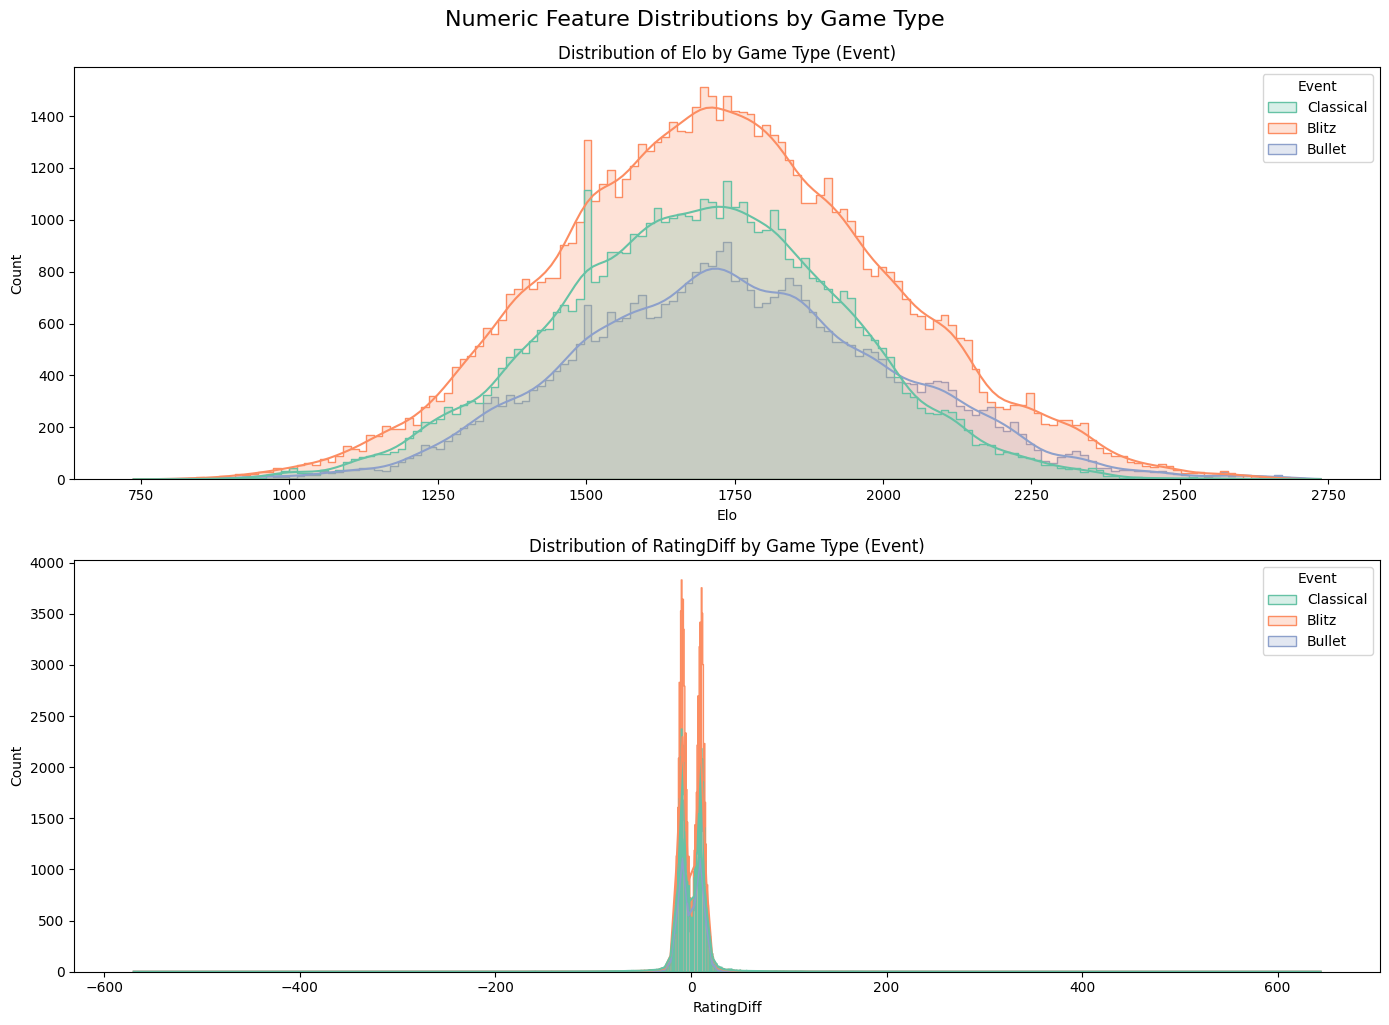

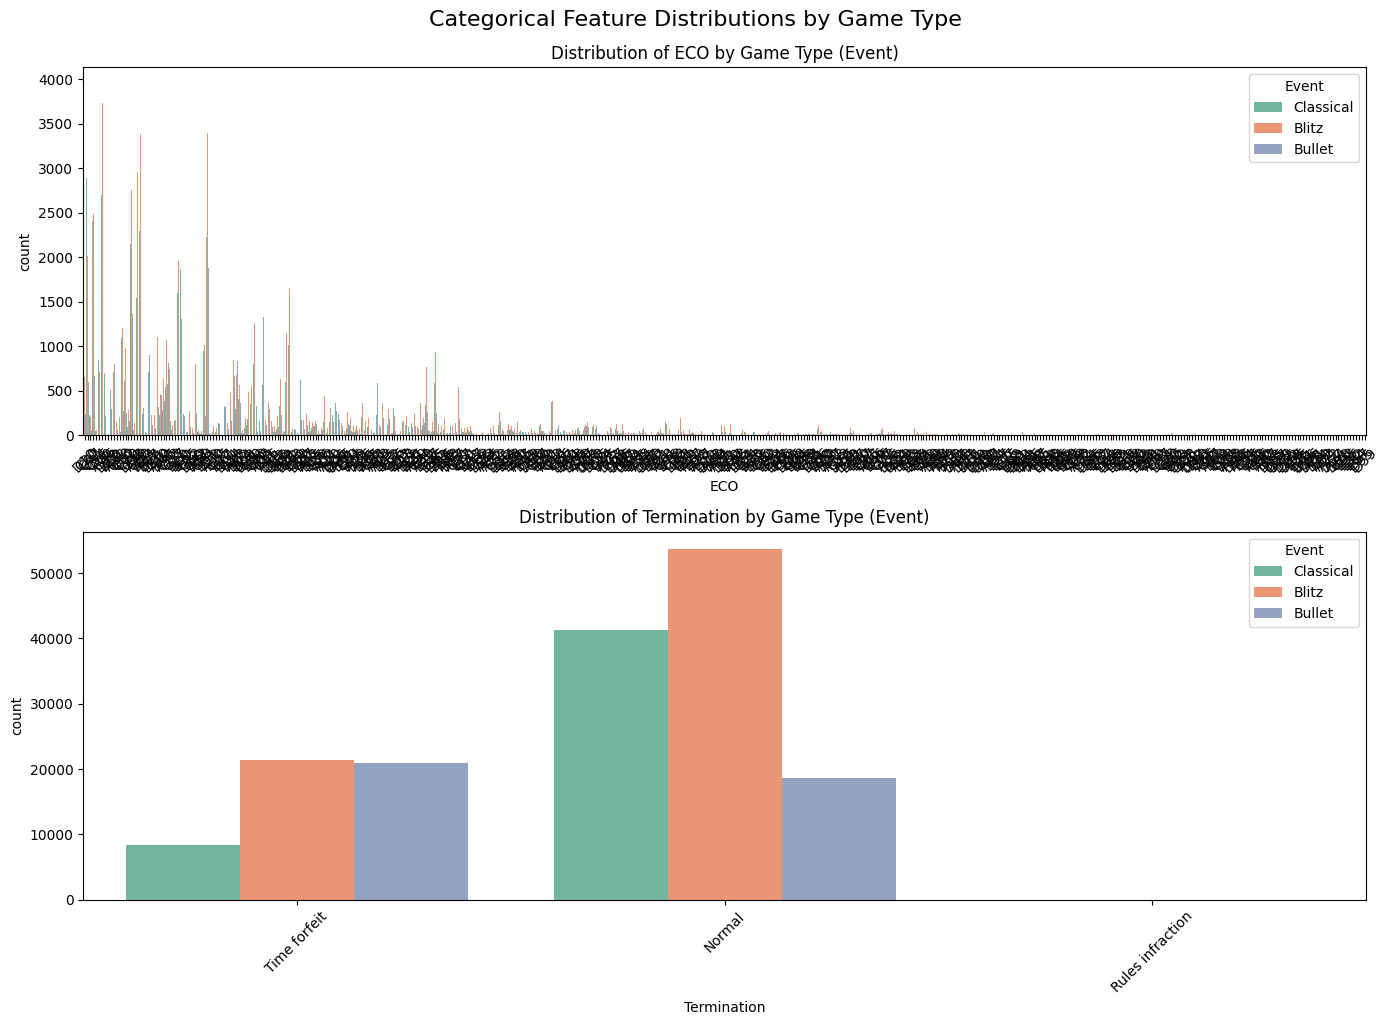

In [11]:

# Keep only the relevant columns and create per-player views
white_df = df[['WhiteElo', 'WhiteRatingDiff', 'ECO', 'Event', 'Termination']].copy()
white_df.columns = ['Elo', 'RatingDiff', 'ECO', 'Event', 'Termination']
white_df['PlayerRole'] = 'White'

black_df = df[['BlackElo', 'BlackRatingDiff', 'ECO', 'Event', 'Termination']].copy()
black_df.columns = ['Elo', 'RatingDiff', 'ECO', 'Event', 'Termination']
black_df['PlayerRole'] = 'Black'

# Combine both player roles
combined_df = pd.concat([white_df, black_df], ignore_index=True)

# ---- Plot Numeric Features ----
numeric_cols = ['Elo', 'RatingDiff']
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(14, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.histplot(
        data=combined_df,
        x=col,
        hue='Event',  # Use Event directly!
        kde=True,
        element='step',
        common_norm=False,
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col} by Game Type (Event)')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.suptitle("Numeric Feature Distributions by Game Type", y=1.02, fontsize=16)
plt.show()

# ---- Plot Categorical Features ----
categorical_cols = ['ECO', 'Termination']
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(14, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=combined_df,
        x=col,
        hue='Event',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col} by Game Type (Event)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions by Game Type", y=1.02, fontsize=16)
plt.show()


In [12]:
white_df.describe()

,Elo,RatingDiff
count,82098.000000,82098.00000
mean,1721.858742,0.53910
std,267.185259,21.85518
min,799.000000,-537.00000
25%,1538.000000,-9.00000
50%,1717.000000,2.00000
75%,1897.000000,10.00000
max,2737.000000,638.00000


In [13]:
black_df.describe()

,Elo,RatingDiff
count,82098.000000,82098.000000
mean,1720.080928,-0.210882
std,268.706008,21.945454
min,738.000000,-570.000000
25%,1536.000000,-10.000000
50%,1716.000000,-2.000000
75%,1896.000000,10.000000
max,2731.000000,644.000000


In [ ]:
Starting to create models
Goal is to predict how much elo a person will gain or lose, based of winning or losing

In [41]:

# Feature selection
features = [
    'WhiteElo', 'BlackElo', 'White_Win', 'Black_Win', 'Draw',
    'Blitz', 'Classical', 'Bullet', 'Rule_Infraction', 'Time_Forfeit'
]
X = df_correct_col[features]
y_white = df_correct_col['WhiteRatingDiff']

# Train/test split
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X, y_white, test_size=0.2, random_state=42
)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

# Base model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)
random_search.fit(X_train_w, y_train_w)

# Best model
best_model = random_search.best_estimator_

# Predict and evaluate
y_pred_w = best_model.predict(X_test_w)
rmse = root_mean_squared_error(y_test_w, y_pred_w)
mae = mean_absolute_error(y_test_w, y_pred_w)
r2 = r2_score(y_test_w, y_pred_w)

# Report
print("📊 WhiteRatingDiff XGBoost Results:")
print(f"  RMSE: {rmse:.3f}")
print(f"  MAE : {mae:.3f}")
print(f"  R²  : {r2:.3f}")
print("\nBest Hyperparameters:")
print(random_search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
📊 WhiteRatingDiff XGBoost Results:
  RMSE: 13.896
  MAE : 3.830
  R²  : 0.609

Best Hyperparameters:
{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.8}


In [44]:
# Define target
y_black = df_correct_col['BlackRatingDiff']

# Train/test split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X, y_black, test_size=0.2, random_state=42
)

# Randomized Search for XGBoost (reuse `param_grid` from earlier)
random_search_black = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)
random_search_black.fit(X_train_b, y_train_b)

# Predict and evaluate
best_model_black = random_search_black.best_estimator_
y_pred_b = best_model_black.predict(X_test_b)

rmse_b = root_mean_squared_error(y_test_b, y_pred_b)
mae_b = mean_absolute_error(y_test_b, y_pred_b)
r2_b = r2_score(y_test_b, y_pred_b)

print("📊 BlackRatingDiff XGBoost Results:")
print(f"  RMSE: {rmse_b:.3f}")
print(f"  MAE : {mae_b:.3f}")
print(f"  R²  : {r2_b:.3f}")
print("\nBest Hyperparameters:")
print(random_search_black.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
📊 BlackRatingDiff XGBoost Results:
  RMSE: 13.585
  MAE : 3.985
  R²  : 0.584

Best Hyperparameters:
{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}


In [45]:
r2_white = r2_score(y_test_w, y_pred_w)
r2_black = r2_score(y_test_black, y_pred_black)

print(f"White R² Score: {r2_white:.3f}")
print(f"Black R² Score: {r2_black:.3f}")


White R² Score: 0.609
Black R² Score: 0.600


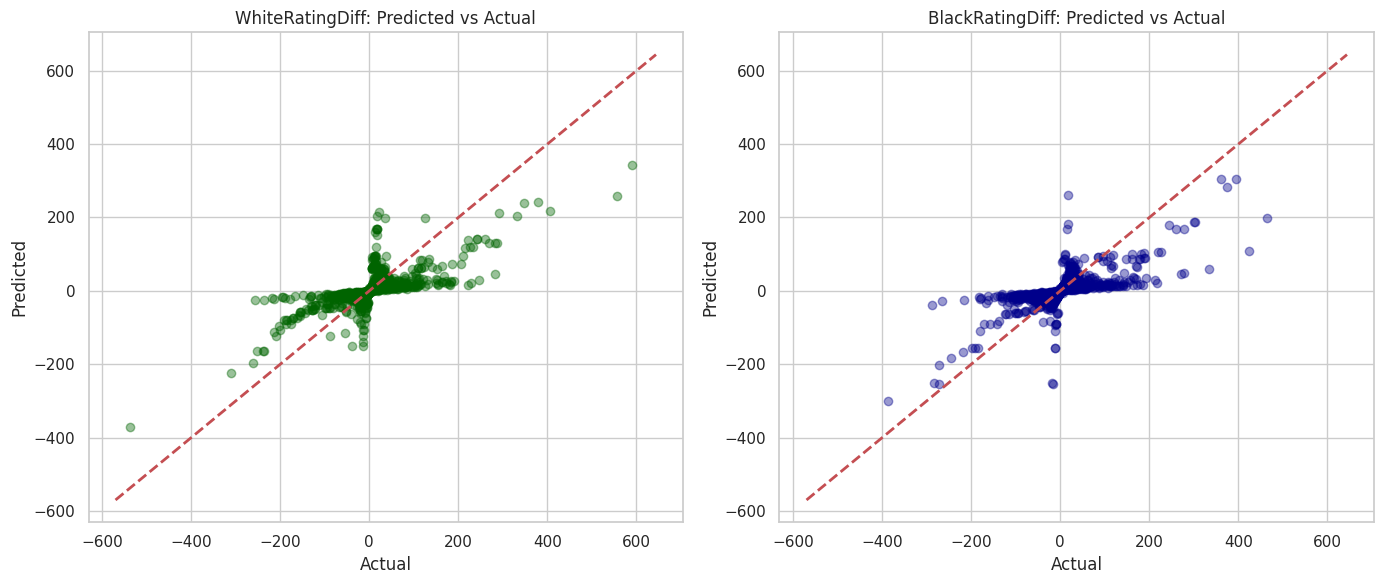

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# WhiteRatingDiff
axes[0].scatter(y_test_w, y_pred_w, alpha=0.4, color='darkgreen')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title("WhiteRatingDiff: Predicted vs Actual")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# BlackRatingDiff
axes[1].scatter(y_test_black, y_pred_black, alpha=0.4, color='darkblue')
axes[1].plot([y_black.min(), y_black.max()], [y_black.min(), y_black.max()], 'r--', lw=2)
axes[1].set_title("BlackRatingDiff: Predicted vs Actual")
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")

plt.tight_layout()
plt.show()


In [30]:
#Using Linear Regression

# You want to predict WhiteRatingDiff, so make sure it’s not used as a feature
features = ['WhiteElo', 'BlackElo', 'White_Win', 'Black_Win', 'Draw', 'Blitz', 'Classical', 'Bullet']

X = df_norm[features]
y = df_correct_col['WhiteRatingDiff']  # use unnormalized target!


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [31]:
y_pred = model.predict(X_test)

# Metrics
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"WhiteRatingDiff Linear Regression Results:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R²: {r2:.3f}")


WhiteRatingDiff Linear Regression Results:
  RMSE: 18.07
  MAE: 5.30
  R²: 0.353


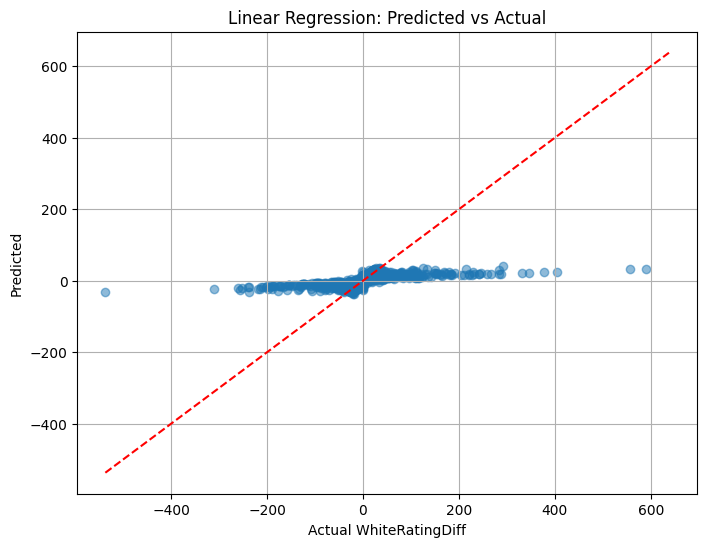

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual WhiteRatingDiff')
plt.ylabel('Predicted')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(True)
plt.show()


In [28]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest R²: 0.6640800247522931


In [32]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=4)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("GradientBoosting R²:", r2_score(y_test, y_pred_gbr))


GradientBoosting R²: 0.7252407314031588


In [ ]:
#Statistical anaylysis

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

df_correct_col['EloGap'] = df_correct_col['WhiteElo'] - df_correct_col['BlackElo']
X = df_correct_col[['EloGap']]
y = df_correct_col['White_Win']  # 1 if White wins, 0 otherwise

model = LogisticRegression()
model.fit(X, y)

print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])
print("AUC:", roc_auc_score(y, model.predict_proba(X)[:, 1]))


Coefficient: 0.004553803061866588
Intercept: -0.02405242219186543
AUC: 0.693274109696485


In [33]:
from scipy.stats import binomtest

# Example:
white_wins = df_correct_col['White_Win'].sum()
total_games = df_correct_col.shape[0]

# Binomial test: is White win rate > 50%?
result = binomtest(white_wins, total_games, p=0.5, alternative='greater')
print(f"P-value for White advantage: {result.pvalue:.5f}")


P-value for White advantage: 1.00000


In [53]:
import statsmodels.api as sm

df_correct_col['EloGap'] = df_correct_col['WhiteElo'] - df_correct_col['BlackElo']
X = df_correct_col[['EloGap', 'White_Win', 'Draw', 'Blitz', 'Classical']]
X = sm.add_constant(X)  # adds intercept
y = df_correct_col['WhiteRatingDiff']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        WhiteRatingDiff   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     9588.
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:24:36   Log-Likelihood:            -3.5084e+05
No. Observations:               82098   AIC:                         7.017e+05
Df Residuals:                   82092   BIC:                         7.017e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.6044      0.141   -103.738      0.0

/tmp/ipykernel_662/3639999689.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elo_vs_winrate = df_correct_col.groupby('EloGapBucket')['White_Win'].mean()


<Axes: title={'center': 'White Win Rate by Elo Gap'}, xlabel='EloGapBucket'>

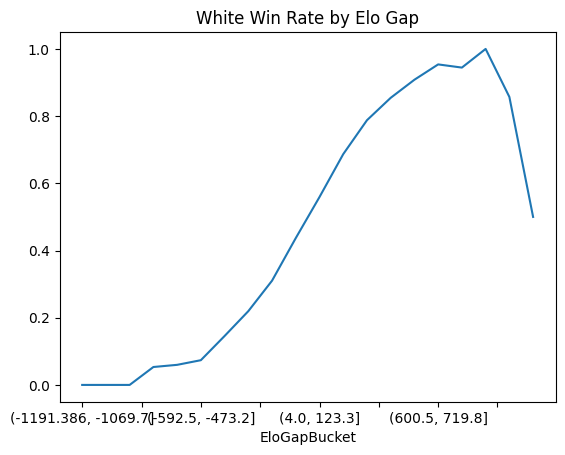

In [50]:
df_correct_col['EloGapBucket'] = pd.cut(df_correct_col['EloGap'], bins=20)

elo_vs_winrate = df_correct_col.groupby('EloGapBucket')['White_Win'].mean()
elo_vs_winrate.plot(kind='line', title='White Win Rate by Elo Gap')


In [18]:
elo_vs_winrate

NameError: name 'elo_vs_winrate' is not defined